In [23]:
import sys
sys.path.insert(0, '../../')  

import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from gasp import process_data_for_gasp, train_gasp, simulate_ssfp_sampling, SSFPParams, responses, sampling

In [24]:
def calculate_RSME(recon, target):
    rmse = np.sqrt(np.mean((recon - target)**2))
    return rmse

def calculate_NRMSE(recon, target):
    nrmse = np.sqrt(np.mean((recon - target)**2) / np.mean(target**2))
    return nrmse

In [31]:
def plot_RMSE(D, sampling_schemes):
    n_points = np.linspace(8, 48, 11).astype(np.int64)   
    RMSE = np.zeros((len(sampling_schemes), len(n_points)))
    print(RMSE.shape)
    for i, scheme in enumerate(sampling_schemes):
        print(f"scheme={scheme[0]}")
        for j, n in enumerate(n_points):
            #print(f"n={n}")
            TRs, PCs = scheme[1](n)
            params = SSFPParams(n, np.deg2rad(60), TRs, PCs)
            M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
            Ic, An = train_gasp(M, D)
            RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
            #plt.plot(np.abs(Ic).T)

    plt.plot(n_points, RMSE.T)
    plt.legend(list(map(lambda x: x[0], sampling_schemes)))
    plt.show()

(6, 11)
scheme=fibonacci
scheme=spiral
scheme=logpolar
scheme=grid
scheme=gridmult
scheme=gridpow2


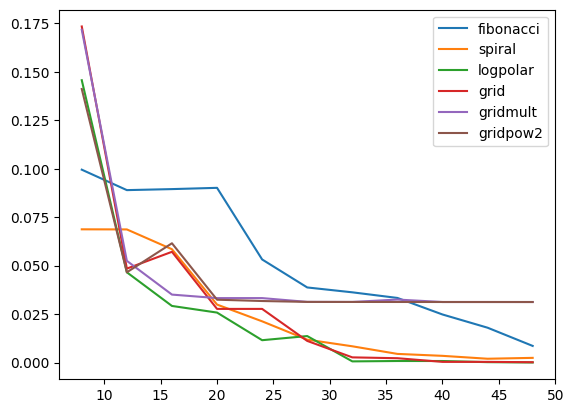

In [32]:
D = responses.gaussian(width=256, bw=0.2, shift=-0.2)
tr_range = (5e-3, 20e-3)

sampling_schemes = [
    ('fibonacci', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=tr_range)),
    ('spiral', lambda n: sampling.spiral_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('logpolar', lambda n: sampling.log_polar_sampling(n_points=n, tr_range=tr_range)),
    ('grid', lambda n: sampling.grid_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('gridmult', lambda n: sampling.grid_multiples_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('gridpow2', lambda n: sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)),
]

plot_RMSE(D, sampling_schemes)

(5, 11)
scheme=fibonacci 5
scheme=fibonacci 10
scheme=fibonacci 15
scheme=fibonacci 20
scheme=fibonacci 25


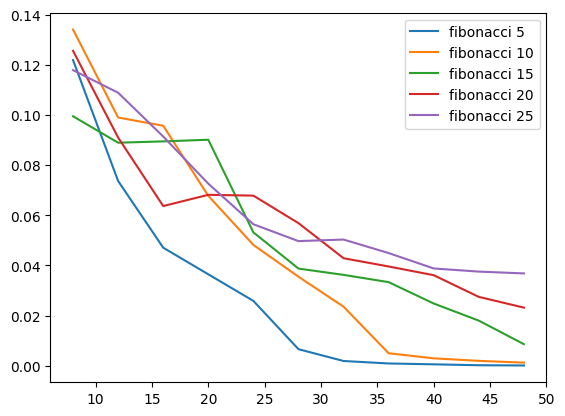

In [28]:
D = responses.gaussian(width=256, bw=0.2, shift=-0.2)

sampling_schemes = [
    ('fibonacci 5', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=(5e-3, 10e-3))),
    ('fibonacci 10', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=(5e-3, 15e-3))),
    ('fibonacci 15', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=(5e-3, 20e-3))),
    ('fibonacci 20', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=(5e-3, 25e-3))),
    ('fibonacci 25', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=(5e-3, 30e-3))),
]

plot_RMSE(D, sampling_schemes)